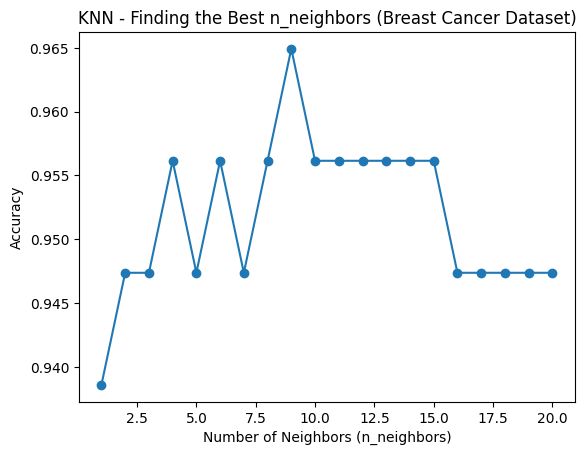

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset using Pandas
# Make sure to replace 'your_dataset.csv' with the actual file path and name
df = pd.read_csv('dataset6.csv')

# Separate the features and target variable
X = df.drop('diagnosis', axis=1)  # Adjust 'diagnosis' to your target column name
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Data (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a model function
def train_knn_model(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    return acc

# For best n_neighbors, plot
neighbors_range = range(1, 21)  # You can adjust this range as needed
accuracy_scores = []

for n in neighbors_range:
    accuracy_scores.append(train_knn_model(n))

# Plotting the results
plt.plot(neighbors_range, accuracy_scores, marker='o')
plt.title('KNN - Finding the Best n_neighbors (Breast Cancer Dataset)')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.show()
